In [1]:
import jax
import numpy as np
import jax.numpy as jnp
from jax import random
from jax import grad, jit, vmap
import scipy.io
from collections import namedtuple
import time
from functools import partial
import matplotlib.pyplot as plt
from init import load_data, setup_model, mmt,plotyield

[data, date, yielddata, yieldmaturity, infl, x, cy_diff, ynom15y, ynom20y, ynom30y] = load_data()
nparam = 20

In [2]:
# values of convenience yields
allcy = [i * 0.05 for i in range(int(2.5 / 0.05) + 1)]
cylen = len(allcy)

# Load results.mat equivalent in Python
results = scipy.io.loadmat('results.mat')
# Extracting data from results (assuming similar structure)
minparamval = results['minparamval']
maxval = len(minparamval[0])

idx = 0
cy = allcy[idx] * cy_diff
param = minparamval[:, idx]

# Setup model (assuming setup_model returns these values)
(N, T, Psi, Sig, I_pi, I_gdp, I_y1, I_yspr, I_cy, inflpos, gdppos, y1pos, 
 ysprpos, pi0, x0, ynom1q0, yspr0, cy0, X2, yielddata, yieldmaturity, eps2) = setup_model(yielddata, yieldmaturity, cy, [], [], infl, x, [], [])

Data=data(Psi, Sig, I_pi, I_gdp, I_y1, I_yspr, I_cy, inflpos, gdppos, y1pos,ysprpos, pi0, x0, ynom1q0, yspr0, cy0, X2, yielddata, yieldmaturity, eps2)

# Call the mmt function with these parameters
result = mmt(param,N,T,Data)
# Process or print the result as needed
print(result) 


460.21924


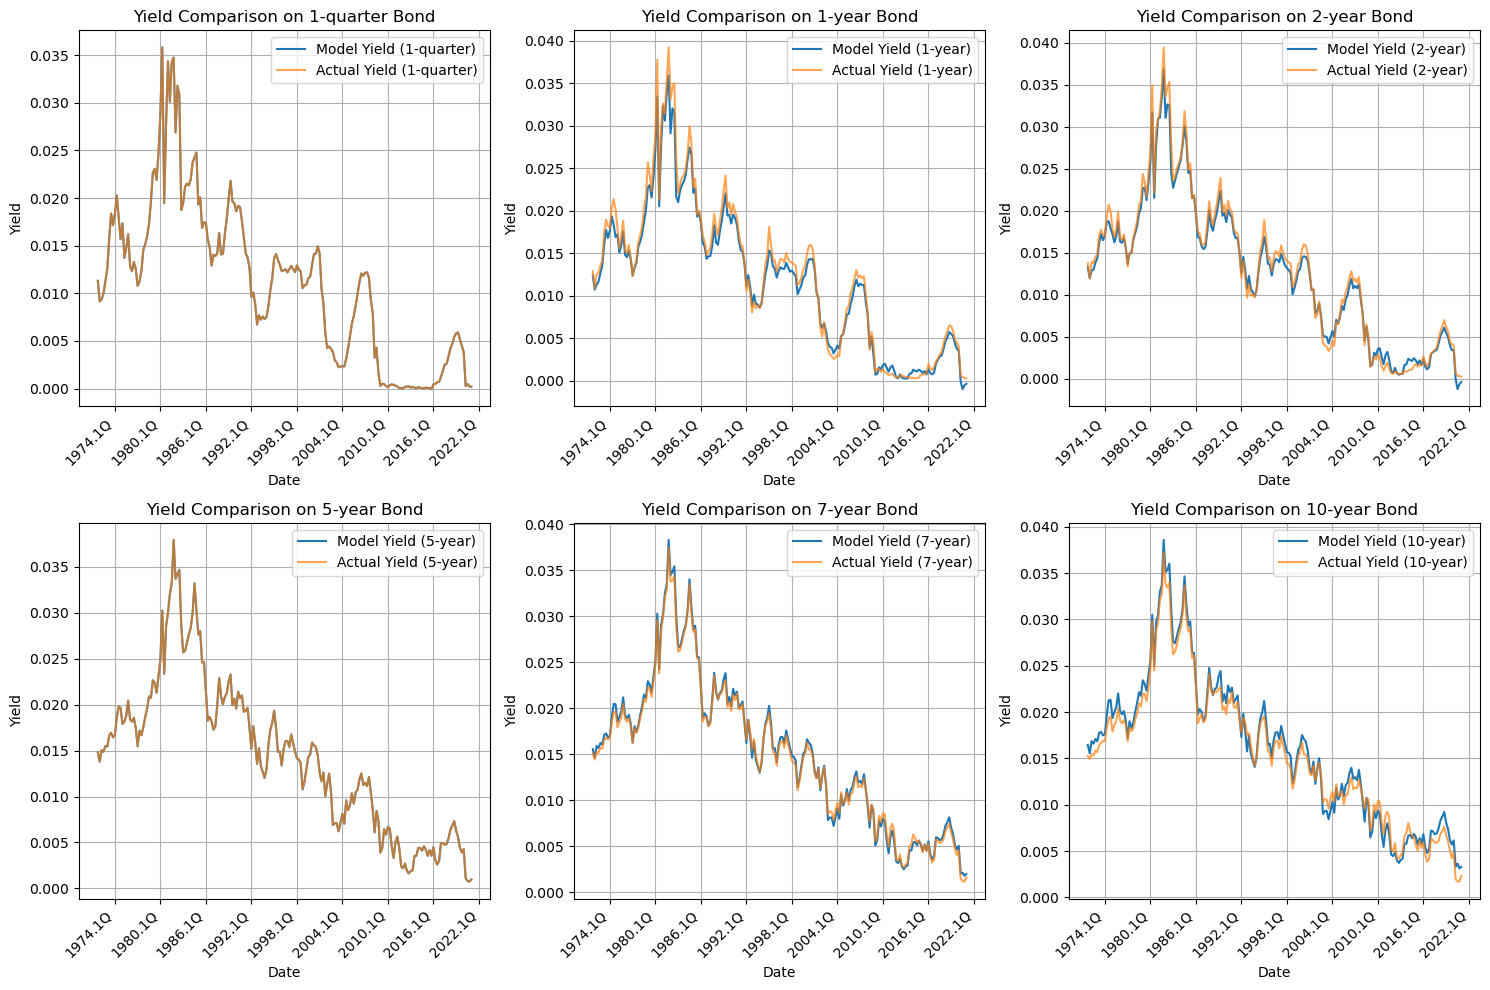

In [6]:
plotyield(param, N, T, Data)

In [8]:
import optax

# main
adam = optax.adam(learning_rate=.001)
losses = []

param1 = param
opt_state = adam.init(param1)
# mmt(param1,N,T,Data)

steps = 1000
for i in range(steps):
    loss, gradient = jax.value_and_grad(mmt)(param1, N,T,Data)
    updates, opt_state = adam.update(gradient, opt_state)
    param1 += updates
    losses.append(loss)
    if ((i+1) % 1 == 0):
        print(f"Step {i}, loss {loss}")

# save both opt_state and param1 into a file

Step 0, loss 369.6850280761719
Step 1, loss 369.6389465332031
Step 2, loss 369.613037109375
Step 3, loss 369.5813293457031
Step 4, loss 369.5537414550781
Step 5, loss 369.5270690917969
Step 6, loss 369.5013427734375
Step 7, loss 369.4667053222656
Step 8, loss 369.4378662109375
Step 9, loss 369.4082946777344
Step 10, loss 369.38128662109375
Step 11, loss 369.3511047363281
Step 12, loss 369.32720947265625
Step 13, loss 369.2929382324219
Step 14, loss 369.27227783203125
Step 15, loss 369.2371520996094
Step 16, loss 369.21185302734375
Step 17, loss 369.1797180175781
Step 18, loss 369.1510314941406
Step 19, loss 369.1242370605469
Step 20, loss 369.0920715332031
Step 21, loss 369.0673828125
Step 22, loss 369.0398254394531
Step 23, loss 369.0054016113281
Step 24, loss 368.976806640625
Step 25, loss 368.9474792480469
Step 26, loss 368.92034912109375
Step 27, loss 368.88995361328125
Step 28, loss 368.8647766113281
Step 29, loss 368.8316345214844
Step 30, loss 368.80572509765625
Step 31, loss 36

In [ ]:
# save param1 into csv file
np.savetxt("param1.csv", param1, delimiter=",")

with open('param1.pkl') as handle:
    pickle.dump(param1, opt_state, handle, protocol=pickle.HIGHEST_PROTOCOL)



# 1. if we confirm consistency between jax and matlab, we can try compare their speed by starting from
# the same randomly generated parameters and checking the time it takes to converge
# NOT YET 2. try this for different values of cy

NameError: name 'np' is not defined